<a href="https://colab.research.google.com/github/raghuch/EVA8_assignments/blob/main/assignment7/assignment7_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/raghuch/EVA8_assignments.git

In [16]:
import sys
import os
#homedir = os.path.dirname(os.path.abspath(__file__))
homedir = os.path.abspath('')
sys.path.append(os.path.dirname(os.path.dirname(homedir)))
#print(os.path.dirname(os.path.dirname(homedir)))

# New Section

In [2]:
from EVA8_assignments.models.simple_resnet import ResNet18

In [3]:
from EVA8_assignments.models.utils.train_loop import train, test, get_schedulder, sgd_optim
from EVA8_assignments.models.utils.data_utils import get_augmented_cifar10_dataset

In [4]:
import torch

In [5]:
SEED = 1
use_cuda = torch.cuda.is_available()
torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed(SEED)
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
device

device(type='cuda')

In [7]:
cifar10_trainloader, cifar10_testloader = get_augmented_cifar10_dataset("/home/raghuc/work/data/")

Files already downloaded and verified
Files already downloaded and verified


In [8]:
myresnet18 = ResNet18()
model =  myresnet18.to(device)
optimizer = sgd_optim(myresnet18, "sgd", lr=1e-3, momentum=0.9)
lr_scheduler = get_schedulder(optimizer, "StepLR", step_size=5, gamma=0.25)

In [9]:
EPOCHS = 20

train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, cifar10_trainloader, optimizer, epoch, train_losses, train_acc)
    lr_scheduler.step()
    test(model, device, cifar10_testloader, test_losses, test_acc)

EPOCH: 0


Loss=1.5509964227676392 Batch_id=781 Accuracy=38.14: 100%|██████████| 782/782 [00:37<00:00, 20.79it/s]



Test set: Average loss: 1.5067, Accuracy: 4913/10000 (49.13%)

EPOCH: 1


Loss=1.1431926488876343 Batch_id=781 Accuracy=50.30: 100%|██████████| 782/782 [00:34<00:00, 22.35it/s]



Test set: Average loss: 1.0112, Accuracy: 6409/10000 (64.09%)

EPOCH: 2


Loss=1.0951366424560547 Batch_id=781 Accuracy=56.70: 100%|██████████| 782/782 [00:35<00:00, 22.15it/s]



Test set: Average loss: 0.9193, Accuracy: 6788/10000 (67.88%)

EPOCH: 3


Loss=1.1826480627059937 Batch_id=781 Accuracy=61.04: 100%|██████████| 782/782 [00:35<00:00, 22.07it/s]



Test set: Average loss: 0.8492, Accuracy: 7007/10000 (70.07%)

EPOCH: 4


Loss=0.974278450012207 Batch_id=781 Accuracy=63.65: 100%|██████████| 782/782 [00:35<00:00, 22.10it/s] 



Test set: Average loss: 0.7090, Accuracy: 7562/10000 (75.62%)

EPOCH: 5


Loss=0.4709005355834961 Batch_id=781 Accuracy=68.51: 100%|██████████| 782/782 [00:35<00:00, 22.16it/s]



Test set: Average loss: 0.5988, Accuracy: 7960/10000 (79.60%)

EPOCH: 6


Loss=1.1003193855285645 Batch_id=781 Accuracy=69.91: 100%|██████████| 782/782 [00:35<00:00, 22.12it/s] 



Test set: Average loss: 0.5958, Accuracy: 7985/10000 (79.85%)

EPOCH: 7


Loss=0.656639575958252 Batch_id=781 Accuracy=70.62: 100%|██████████| 782/782 [00:35<00:00, 22.17it/s] 



Test set: Average loss: 0.5931, Accuracy: 7984/10000 (79.84%)

EPOCH: 8


Loss=0.9870917201042175 Batch_id=781 Accuracy=71.06: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s] 



Test set: Average loss: 0.5639, Accuracy: 8097/10000 (80.97%)

EPOCH: 9


Loss=1.0253136157989502 Batch_id=781 Accuracy=71.60: 100%|██████████| 782/782 [00:35<00:00, 22.13it/s] 



Test set: Average loss: 0.5684, Accuracy: 8105/10000 (81.05%)

EPOCH: 10


Loss=0.968083918094635 Batch_id=781 Accuracy=73.16: 100%|██████████| 782/782 [00:35<00:00, 22.03it/s]  



Test set: Average loss: 0.5267, Accuracy: 8210/10000 (82.10%)

EPOCH: 11


Loss=1.1238430738449097 Batch_id=781 Accuracy=73.43: 100%|██████████| 782/782 [00:35<00:00, 22.14it/s] 



Test set: Average loss: 0.5186, Accuracy: 8247/10000 (82.47%)

EPOCH: 12


Loss=0.6020930409431458 Batch_id=781 Accuracy=73.66: 100%|██████████| 782/782 [00:35<00:00, 22.10it/s] 



Test set: Average loss: 0.5130, Accuracy: 8265/10000 (82.65%)

EPOCH: 13


Loss=0.5537580847740173 Batch_id=781 Accuracy=73.92: 100%|██████████| 782/782 [00:35<00:00, 22.08it/s] 



Test set: Average loss: 0.5076, Accuracy: 8277/10000 (82.77%)

EPOCH: 14


Loss=1.1790578365325928 Batch_id=781 Accuracy=73.75: 100%|██████████| 782/782 [00:35<00:00, 22.13it/s] 



Test set: Average loss: 0.5038, Accuracy: 8299/10000 (82.99%)

EPOCH: 15


Loss=0.5670164227485657 Batch_id=781 Accuracy=74.27: 100%|██████████| 782/782 [00:35<00:00, 22.10it/s] 



Test set: Average loss: 0.4998, Accuracy: 8324/10000 (83.24%)

EPOCH: 16


Loss=1.0765894651412964 Batch_id=781 Accuracy=74.39: 100%|██████████| 782/782 [00:35<00:00, 22.11it/s] 



Test set: Average loss: 0.5051, Accuracy: 8310/10000 (83.10%)

EPOCH: 17


Loss=0.5874897241592407 Batch_id=781 Accuracy=74.59: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s] 



Test set: Average loss: 0.4985, Accuracy: 8326/10000 (83.26%)

EPOCH: 18


Loss=0.5122009515762329 Batch_id=781 Accuracy=74.69: 100%|██████████| 782/782 [00:35<00:00, 22.10it/s] 



Test set: Average loss: 0.4954, Accuracy: 8311/10000 (83.11%)

EPOCH: 19


Loss=0.5206790566444397 Batch_id=781 Accuracy=74.43: 100%|██████████| 782/782 [00:35<00:00, 22.05it/s] 



Test set: Average loss: 0.4973, Accuracy: 8316/10000 (83.16%)



In [219]:
from EVA8_assignments.models.utils.img_utils import get_misclassified_imgs, display_imgs, display_imgs_gradcam

ImportError: cannot import name 'display_imgs_gradcam' from 'EVA8_assignments.models.utils.img_utils' (/home/raghuc/work/EVA8_assignments/models/utils/img_utils.py)

In [29]:
incorrect_imgs, incorrect_labels, correct_labels = get_misclassified_imgs(myresnet18, test_dataloader=cifar10_testloader)

In [10]:
torch.save(myresnet18, "./simple_resnet18.pth")

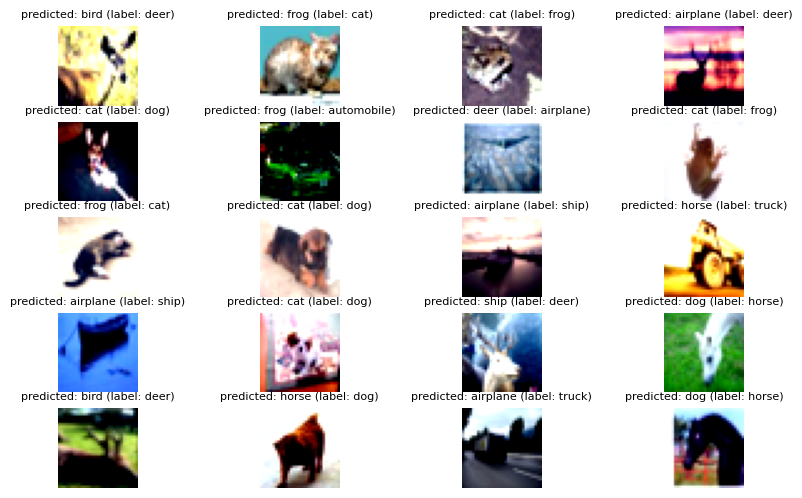

In [105]:
import matplotlib.pyplot as plt
import numpy as np
display_imgs(incorrect_imgs, incorrect_labels, correct_labels)

In [121]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layers = [myresnet18.layer4[-1]]

In [114]:
incorrect_imgs_tensor = [torch.from_numpy(i).to(device) for i in incorrect_imgs]

In [119]:
cam = GradCAM(myresnet18, target_layers=target_layers, use_cuda=use_cuda)

In [195]:
visualization_arr = []
for i in range(len(incorrect_imgs)):
    gs_cam = cam(input_tensor=incorrect_imgs_tensor[i].unsqueeze(0))
    gs_cam = gs_cam[0,:]
    rescaled_img = (incorrect_imgs[i] - np.min(incorrect_imgs[i]))/np.ptp(incorrect_imgs[i])
    vis = show_cam_on_image(rescaled_img.transpose(1,2,0), gs_cam)
    visualization_arr.append(vis)

In [217]:
def display_imgs_gradcam(img_lst, label_lst, correct_label_lst, vis_lst):
    fig = plt.figure(figsize=(10, 6))
    rows = 5 
    cols = 4
    for idx in np.arange(1, rows*cols + 1):
        ax = fig.add_subplot(rows, cols, idx)
        ax.set_title(f"predicted: {cifar_label_idx_to_name[label_lst[idx].squeeze()]} (label: {cifar_label_idx_to_name[correct_label_lst[idx].squeeze()]})",
                     fontdict={'fontsize':8})
        ax.axis('off')
        img = img_lst[idx]
        img = img/2 + 0.5
        img = np.clip(img, 0, 1)
        plt.imshow(img.transpose(1,2,0))
        plt.imshow(vis_lst[idx], alpha=0.5)
    #plt.subplots
    plt.show()

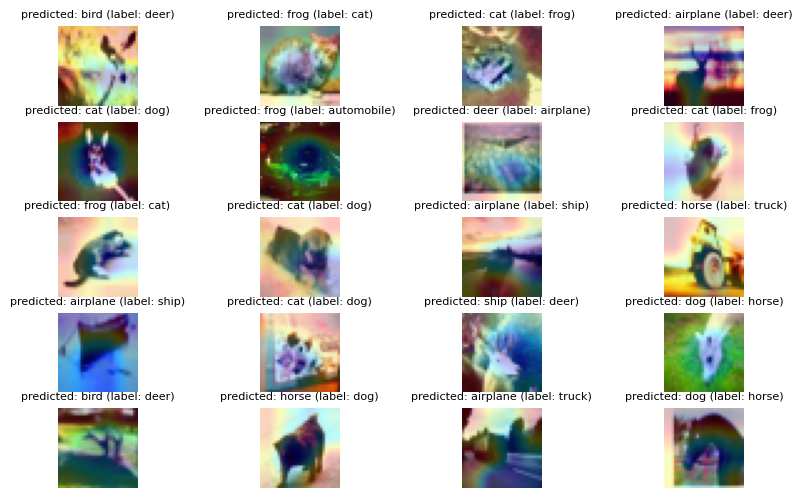

In [218]:
display_imgs_gradcam(incorrect_imgs, incorrect_labels, correct_labels, visualization_arr)